## Analyzing the Air bnb datasets for Seattle and Boston

### Part of the first project for DataScience Nanodegree from Udacity

### Data Scientist: Rafael Mata M.

### Date Created: 15 October 2020
### Last updated: 27 October 2020

#### Import the libraries 

In [2538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn import preprocessing

# if needed download stopwords and punkt

import nltk
nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rafaelmata357/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rafaelmata357/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Read the datasets

In [2539]:
boston_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Boston/'
seattle_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Seattle/'

#### Boston Datasets

In [2540]:
boston_df_listings = pd.read_csv(boston_dir+'listings.csv')
boston_df_calendar = pd.read_csv(boston_dir+'calendar.csv')
boston_df_reviews = pd.read_csv(boston_dir+'reviews.csv')
print('Boston datasets read...')

Boston datasets read...


## DATA UNDERSTANDING

There is three datasets:
    
- listings: contains the list of airbnb's houses in the Boston and Seattle area
- calendar: the availabily of houses
- reviews: Reviews for the houses

The datasets can be found here

#### Datasets shapes

In [2541]:
print('BOSTON datasets Shape')
print('Listings dataset: {}'.format(boston_df_listings.shape))
print('Calendar dataset: {}'.format(boston_df_calendar.shape))
print('Reviews dataset: {}'.format(boston_df_reviews.shape))

BOSTON datasets Shape
Listings dataset: (3585, 95)
Calendar dataset: (1308890, 4)
Reviews dataset: (68275, 6)


In [2542]:
boston_df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location f...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoye...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nic...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. ...


In [2543]:
boston_df_calendar.head(5)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [2544]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 20)
boston_df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airb...,20160906204935,2016-09-07,Sunny Bungalow i...,"Cozy, sunny, fam...",The house has an...,"Cozy, sunny, fam...",none,Roslindale is qu...,NaN,The bus stop is ...,You will have ac...,NaN,Clean up and tre...,https://a2.musca...,https://a2.musca...,https://a2.musca...,https://a2.musca...,31303940,https://www.airb...,Virginia,2015-04-15,"Boston, Massachu...",We are country a...,NaN,NaN,NaN,f,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,f,"Birch Street, Bo...",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless In...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airb...,20160906204935,2016-09-07,Charming room in...,Charming and qui...,Small but cozy a...,Charming and qui...,none,The room is in R...,If you don't hav...,Plenty of safe s...,Apt has one more...,"If I am at home,...",Pet friendly but...,https://a1.musca...,https://a1.musca...,https://a1.musca...,https://a1.musca...,2572247,https://www.airb...,Andrea,2012-06-07,"Boston, Massachu...",I live in Boston...,within an hour,100%,100%,f,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,t,Pinehurst Street...,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wi...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airb...,20160906204935,2016-09-07,Mexican Folk Art...,Come stay with a...,Come stay with a...,Come stay with a...,none,The LOCATION: Ro...,I am in a scenic...,PUBLIC TRANSPORT...,I am living in t...,ABOUT ME: I'm a ...,I encourage you ...,https://a2.musca...,https://a2.musca...,https://a2.musca...,https://a2.musca...,16701,https://www.airb...,Phil,2009-05-11,"Boston, Massachu...",I am a middle-ag...,within a few hours,100%,88%,t,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,t,"Ardale St., Bost...",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""...",NaN,$65.00,$395.00,"$1,350.00",NaN,NaN,1,$20.00,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,2009-07-

### Select the features from listings that are  going to be considered in the analysis

In [2545]:
listings_features = ['id', 'neighborhood_overview', 'transit', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'host_is_superhost',
       'availability_30', 'availability_60', 'availability_90', 'availability_365',
                     'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 
                     'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','price', 'guests_included', 
                     'extra_people', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                     'cancellation_policy', 'reviews_per_month']

In [2546]:
boston_df2_listings = boston_df_listings[listings_features].copy()


#### Nan values in the datasets

In [2547]:
boston_nulls_listings = boston_df2_listings.isnull().sum()/boston_df_listings.shape[0]*100
boston_nulls_calendar = boston_df_calendar.isnull().sum()/boston_df_calendar.shape[0]*100
boston_nulls_reviews  = boston_df_reviews.isnull().sum()/boston_df_reviews.shape[0]*100


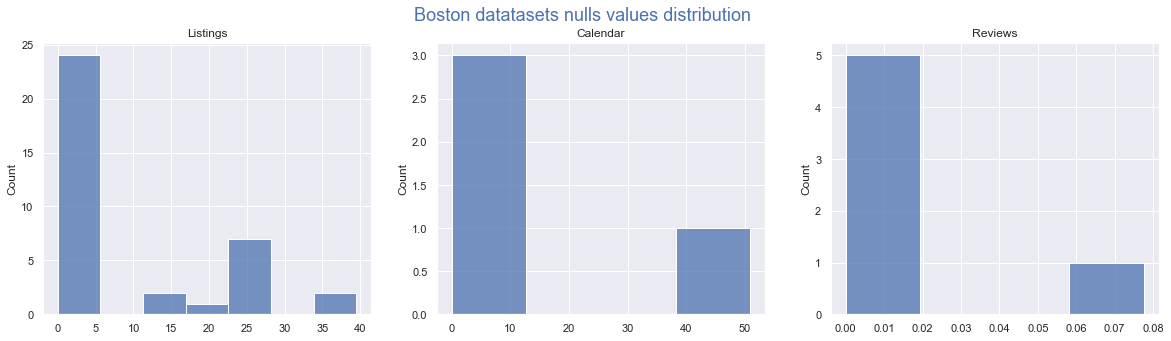

In [2548]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Boston datatasets nulls values distribution', fontsize=18, c='b')
#boston_nulls_listings.hist(ax=ax[0])
sns.histplot(data=boston_nulls_listings,x=boston_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=boston_nulls_calendar,x=boston_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=boston_nulls_reviews,x=boston_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

### It looks that  the Listings datasets have the more columns with Nan values below will be process this Nan values

#### Columns with more than 20% Nan Values

In [2549]:
print('BOSTON')
print('Listings dataset columns with more than 20% Nan values')
boston_df2_listings.columns[boston_nulls_listings >= 20]

BOSTON
Listings dataset columns with more than 20% Nan values


Index(['neighborhood_overview', 'transit', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

## Data Cleaning and preprocessing

### Convert date columns to year, month, week, dayofWeek

In [2550]:
boston_df_calendar['month'] = pd.to_datetime(boston_df_calendar['date']).dt.month
boston_df_calendar['year'] = pd.to_datetime(boston_df_calendar['date']).dt.year
boston_df_calendar['dayofweek'] = pd.to_datetime(boston_df_calendar['date']).dt.dayofweek

In [2551]:
boston_df_reviews['month'] = pd.to_datetime(boston_df_reviews['date']).dt.month
boston_df_reviews['year'] = pd.to_datetime(boston_df_reviews['date']).dt.year
boston_df_reviews['dayofweek'] = pd.to_datetime(boston_df_reviews['date']).dt.dayofweek

### Using the NLTK library, preprocessing the text columns to extract some features to include in the model

Based on [this](https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7) article from **medium** to use the NLTK

In [2552]:
# Function to preprocess the text columns a eliminate word stoppers and puntuantion 

import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
 

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [2553]:
# Copy the text columns to analyze into a new dataframe

df = boston_listings_df2[['neighborhood_overview','transit','amenities']].copy()

## Convert to string this columns 
df['transit_str'] = df['transit'].astype(str)
df['amenities_str'] = df['amenities'].astype(str)
df['neighborhood_str'] = df['neighborhood_overview'].astype(str)

# Convert to tokens the columns

df['amenities_token'] = df['amenities_str'].apply(preprocess)
df['neighborhood_token'] = df['neighborhood_str'].apply(preprocess)
df['transit_token'] = df['transit_str'].apply(preprocess)



In [2554]:
# Most commong words
print('Most amenities column common words')
from collections import Counter
Counter(" ".join(df["amenities_token"]).split()).most_common(10)


Most amenities column common words


[('internet', 5998),
 ('detector', 5353),
 ('tv', 4377),
 ('dryer', 4289),
 ('wireless', 4260),
 ('friendli', 3722),
 ('heat', 3384),
 ('kitchen', 3284),
 ('smoke', 3006),
 ('essenti', 2994)]

In [2555]:
# Most commong words
print('Most transit column common words')
from collections import Counter
Counter(" ".join(df["transit_token"]).split()).most_common(10)

Most transit column common words


[('walk', 2416),
 ('minut', 2382),
 ('line', 2240),
 ('boston', 1766),
 ('station', 1691),
 ('nan', 1290),
 ('park', 1254),
 ('bu', 1191),
 ('stop', 1142),
 ('street', 1053)]

In [2556]:
# Most commong words
print('Most neighborhood column common words')
from collections import Counter
Counter(" ".join(df["neighborhood_token"]).split()).most_common(10)

Most neighborhood column common words


[('boston', 2575),
 ('walk', 1593),
 ('neighborhood', 1544),
 ('restaur', 1471),
 ('nan', 1415),
 ('street', 1013),
 ('shop', 916),
 ('park', 896),
 ('locat', 778),
 ('minut', 765)]

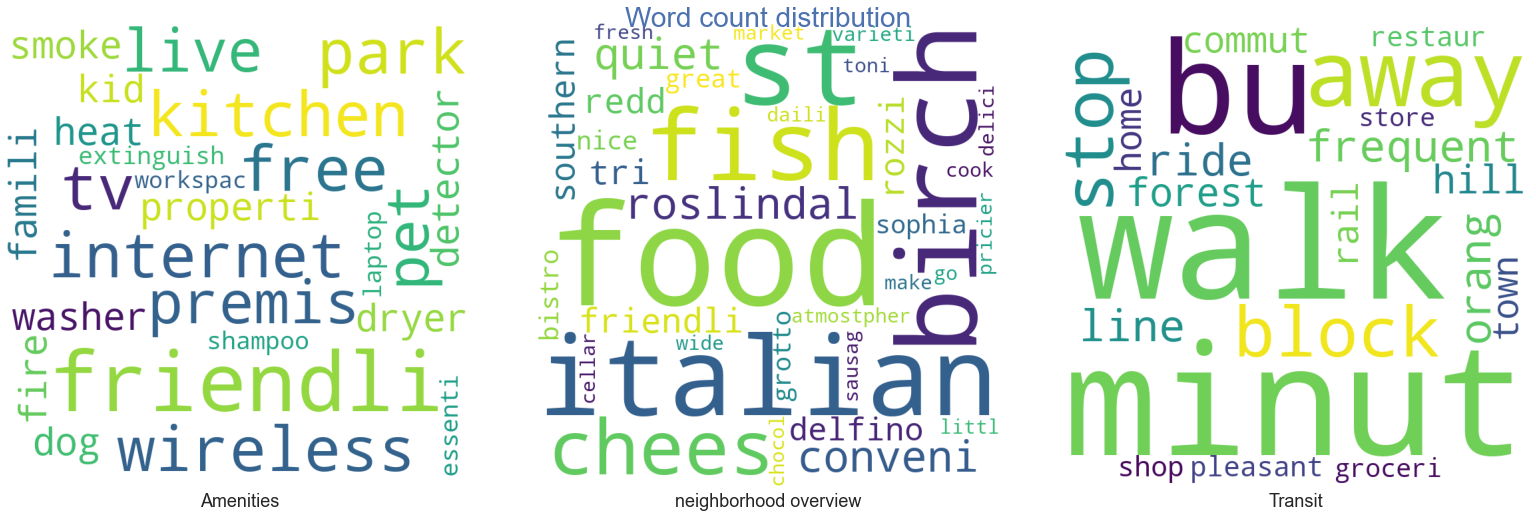

In [2557]:
def word_cloud(column):

    all_words = '' 

    for arg in column: 
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
        wordcloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 8).generate(all_words) 
        
        return all_words, wordcloud
  
fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(22,7)) 
fig.suptitle('Word count distribution', fontsize=28, c='b')                        

amenities_aw, amenities_wc =  word_cloud(df['amenities_token']) 
neighbor_aw, neighbor_wc =  word_cloud(df['neighborhood_token'])
transit_aw, transit_wc =  word_cloud(df['transit_token'])

ax[0].imshow(amenities_wc) 
#ax[0].axis("off")
ax[0].get_yaxis().set_ticks([])
ax[0].get_xaxis().set_ticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Amenities',fontsize=18)
ax[1].imshow(neighbor_wc) 
ax[1].get_yaxis().set_ticks([])
ax[1].get_xaxis().set_ticks([])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel('neighborhood overview',fontsize=18) 
ax[2].imshow(transit_wc) 
ax[2].get_yaxis().set_ticks([])
ax[2].get_xaxis().set_ticks([])
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].set_xlabel('Transit',fontsize=18) 
plt.tight_layout(pad = 0)

In [2558]:
from nltk.util import ngrams
n_gram = 5
n_gram_dic = dict(Counter(ngrams(neighbor_aw.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 1:
        print(i, n_gram_dic[i])

('roslindal', 'quiet', 'conveni', 'friendli', 'southern') 1
('quiet', 'conveni', 'friendli', 'southern', 'food') 1
('conveni', 'friendli', 'southern', 'food', 'tri') 1
('friendli', 'southern', 'food', 'tri', 'redd') 1
('southern', 'food', 'tri', 'redd', 'rozzi') 1
('food', 'tri', 'redd', 'rozzi', 'italian') 1
('tri', 'redd', 'rozzi', 'italian', 'delfino') 1
('redd', 'rozzi', 'italian', 'delfino', 'sophia') 1
('rozzi', 'italian', 'delfino', 'sophia', 'grotto') 1
('italian', 'delfino', 'sophia', 'grotto', 'great') 1
('delfino', 'sophia', 'grotto', 'great', 'birch') 1
('sophia', 'grotto', 'great', 'birch', 'st') 1
('grotto', 'great', 'birch', 'st', 'bistro') 1
('great', 'birch', 'st', 'bistro', 'nice') 1
('birch', 'st', 'bistro', 'nice', 'atmostpher') 1
('st', 'bistro', 'nice', 'atmostpher', 'littl') 1
('bistro', 'nice', 'atmostpher', 'littl', 'pricier') 1
('nice', 'atmostpher', 'littl', 'pricier', 'cook') 1
('atmostpher', 'littl', 'pricier', 'cook', 'fish') 1
('littl', 'pricier', 'cook',

In [2559]:
from nltk.util import ngrams
n_gram = 4
n_gram_dic = dict(Counter(ngrams(transit_aw.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 1:
        print(i, n_gram_dic[i])

('bu', 'stop', 'block', 'away') 1
('stop', 'block', 'away', 'frequent') 1
('block', 'away', 'frequent', 'bu') 1
('away', 'frequent', 'bu', 'minut') 1
('frequent', 'bu', 'minut', 'ride') 1
('bu', 'minut', 'ride', 'orang') 1
('minut', 'ride', 'orang', 'line') 1
('ride', 'orang', 'line', 'forest') 1
('orang', 'line', 'forest', 'hill') 1
('line', 'forest', 'hill', 'commut') 1
('forest', 'hill', 'commut', 'rail') 1
('hill', 'commut', 'rail', 'town') 1
('commut', 'rail', 'town', 'minut') 1
('rail', 'town', 'minut', 'walk') 1
('town', 'minut', 'walk', 'home') 1
('minut', 'walk', 'home', 'walk') 1
('walk', 'home', 'walk', 'pleasant') 1
('home', 'walk', 'pleasant', 'restaur') 1
('walk', 'pleasant', 'restaur', 'shop') 1
('pleasant', 'restaur', 'shop', 'groceri') 1
('restaur', 'shop', 'groceri', 'store') 1
('shop', 'groceri', 'store', 'minut') 1
('groceri', 'store', 'minut', 'walk') 1
('store', 'minut', 'walk', 'away') 1


In [2560]:
from nltk.util import ngrams
n_gram = 4
n_gram_dic = dict(Counter(ngrams(amenities_aw.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 1:
        print(i, n_gram_dic[i])

('tv', 'wireless', 'internet', 'kitchen') 1
('wireless', 'internet', 'kitchen', 'free') 1
('internet', 'kitchen', 'free', 'park') 1
('kitchen', 'free', 'park', 'premis') 1
('free', 'park', 'premis', 'pet') 1
('park', 'premis', 'pet', 'live') 1
('premis', 'pet', 'live', 'properti') 1
('pet', 'live', 'properti', 'dog') 1
('live', 'properti', 'dog', 'heat') 1
('properti', 'dog', 'heat', 'famili') 1
('dog', 'heat', 'famili', 'kid') 1
('heat', 'famili', 'kid', 'friendli') 1
('famili', 'kid', 'friendli', 'washer') 1
('kid', 'friendli', 'washer', 'dryer') 1
('friendli', 'washer', 'dryer', 'smoke') 1
('washer', 'dryer', 'smoke', 'detector') 1
('dryer', 'smoke', 'detector', 'fire') 1
('smoke', 'detector', 'fire', 'extinguish') 1
('detector', 'fire', 'extinguish', 'essenti') 1
('fire', 'extinguish', 'essenti', 'shampoo') 1
('extinguish', 'essenti', 'shampoo', 'laptop') 1
('essenti', 'shampoo', 'laptop', 'friendli') 1
('shampoo', 'laptop', 'friendli', 'workspac') 1


### Using the word analysis convert the categorical variables

### Encode the amenities columns to numerical columns

In [2561]:
df['tv'] = 0
df['internet'] = 0
df['pet-friendly'] = 0
df['kitchen'] = 0
df['air-condition'] = 0

df['family-friendly'] = 0
df['free-park']= 0
df['gym'] = 0

In [2562]:
df.loc[df['amenities_token'].str.contains('tv'),'tv'] = 1
df.loc[df['amenities_token'].str.contains('internet'),'internet'] = 1
df.loc[df['amenities_token'].str.contains('pet'),'pet-friendly'] = 1
df.loc[df['amenities_token'].str.contains('kitchen'),'kitchen'] = 1
df.loc[df['amenities_token'].str.contains('air'),'air-condition'] = 1
df.loc[df['amenities_token'].str.contains('famili'),'family-friendly'] = 1
df.loc[df['amenities_token'].str.contains('park'),'free-park'] = 1
df.loc[df['amenities_token'].str.contains('gym'),'gym'] = 1

In [2563]:
df['bus-stop'] = 0
df.loc[df['transit_token'].str.contains('bu'),'bus-stop'] = 1

In [2564]:
df['restaurants-near'] = 0
df['downtown-near'] = 0
df['park-near'] = 0

In [2565]:
df.loc[df['neighborhood_token'].str.contains('restau'),'restaurants-near'] = 1
df.loc[df['neighborhood_token'].str.contains('downtown'),'downtown-near'] = 1
df.loc[df['neighborhood_token'].str.contains('park'),'park-near'] = 1

### Drop text columns

In [2566]:
df.drop(columns =['neighborhood_overview', 'transit', 'amenities', 
                  'transit_str','amenities_str', 'neighborhood_str', 'amenities_token', 'neighborhood_token', 'transit_token'],inplace=True)

### Analyze what percentage of listing have the features obtained from the text columns analyzed

In [2567]:
df.mean().to_frame().T*100

,tv,internet,pet-friendly,kitchen,air-condition,family-friendly,free-park,gym,bus-stop,restaurants-near,downtown-near,park-near
0,76.011158,96.485356,22.482566,91.603905,87.057183,52.663877,23.542538,13.361227,34.700139,33.974895,11.966527,19.330544


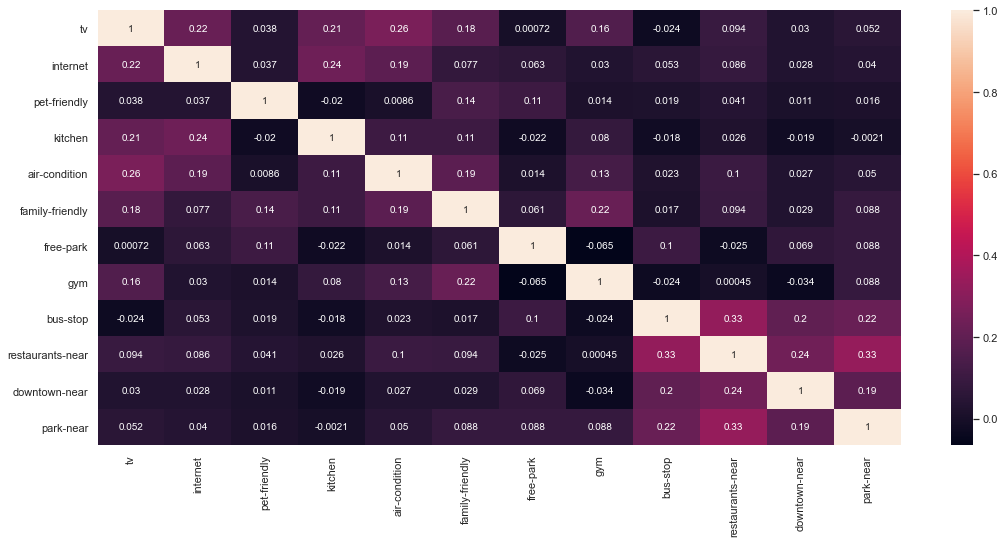

In [2568]:
plt.figure(figsize=(18,8))
corr =df.corr()
sns.heatmap(corr, annot=True);

In [2569]:
boston_df2_listings.drop(columns=['neighborhood_overview','transit','amenities'],inplace=True)

### Convert the percentage numeric columns to float

In [2570]:
boston_df2_listings.host_response_rate = boston_df2_listings.host_response_rate.str.replace('%','').astype(float)
boston_df2_listings.host_acceptance_rate = boston_df2_listings.host_acceptance_rate.str.replace('%','').astype(float)


### Add the encode columns to a new dataframe

In [2571]:
boston_df3_listings = pd.concat([boston_df2_listings, df],axis=1)

### Convert Superhost column to numeric

In [2572]:
boston_df3_listings.host_is_superhost = boston_df3_listings.host_is_superhost.str.replace('t','1')
boston_df3_listings.host_is_superhost = boston_df3_listings.host_is_superhost.str.replace('f','0')
boston_df3_listings.host_is_superhost = boston_df3_listings.host_is_superhost.astype(float)

### Convert to percentange the listings availability

In [2573]:
boston_df3_listings['availability_30'] = boston_df3_listings['availability_30']/30
boston_df3_listings['availability_60'] = boston_df3_listings['availability_60']/60
boston_df3_listings['availability_90'] = boston_df3_listings['availability_90']/90
boston_df3_listings['availability_365'] = boston_df3_listings['availability_365']/365

### Convert price column to float

In [2574]:
boston_df3_listings.price = boston_df3_listings.price.str.replace('$','')
boston_df3_listings.price = boston_df3_listings.price.str.replace(',','').astype(float)

#### Convert extra peoplo price to float

In [2575]:
boston_df3_listings.extra_people = boston_df3_listings.extra_people.str.replace('$','')
boston_df3_listings.extra_people = boston_df3_listings.extra_people.str.replace(',','').astype(float)

<AxesSubplot:ylabel='Frequency'>

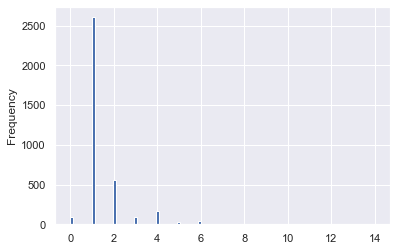

In [2576]:
boston_df3_listings.guests_included.plot.hist(bins=100)

### Encode  the categorical columns 

#### First replace the nan values
- Property Type

In [2577]:
boston_df3_listings.property_type.fillna('Other',inplace=True)

In [2578]:
property_values = boston_df3_listings[['property_type']].values
property_values_list = list(set(property_values[:,0]))

In [2579]:
le_property = preprocessing.LabelEncoder()
le_property.fit(property_values_list)
boston_df3_listings['property_type']=le_property.transform(property_values[:,0])

- Room type

In [2580]:
room_values = boston_df3_listings[['room_type']].values
room_values_list = list(set(room_values[:,0]))

In [2581]:
le_room = preprocessing.LabelEncoder()
le_room.fit(room_values_list)
boston_df3_listings['room_type']=le_room.transform(room_values[:,0])

- Bed Type

In [2582]:
bed_values = boston_df3_listings[['bed_type']].values
bed_values_list = list(set(bed_values[:,0]))

In [2583]:
le_bed = preprocessing.LabelEncoder()
le_bed.fit(bed_values_list)
boston_df3_listings['bed_type']=le_bed.transform(bed_values[:,0])

- Cacellation Policy

In [2584]:
cancellation_values = boston_df3_listings[['cancellation_policy']].values
cancellation_values_list = list(set(cancellation_values[:,0]))

In [2585]:
le_cancellation = preprocessing.LabelEncoder()
le_cancellation.fit(cancellation_values_list)
boston_df3_listings['cancellation_policy']=le_cancellation.transform(cancellation_values[:,0])

## INPUTING
#### Replace the remaining columns with Nan values using the mean or most common value

In [2586]:
boston_df3_listings.columns[boston_df3_listings.isnull().sum()>0]

Index(['host_response_rate', 'host_acceptance_rate', 'zipcode', 'bathrooms',
       'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

- bathrooms

In [2587]:
most_common = boston_df3_listings.bathrooms.value_counts().index[0]
boston_df3_listings.bathrooms.fillna(most_common,inplace=True)

- bedrooms

In [2588]:
most_common = boston_df3_listings.bedrooms.value_counts().index[0]
boston_df3_listings.bedrooms.fillna(most_common,inplace=True)

- beds

In [2589]:
most_common = boston_df3_listings.beds.value_counts().index[0]
boston_df3_listings.beds.fillna(most_common,inplace=True)

### Replace the NaN values for the Zipcode looking the right code using the GPS Coordinate

In [2590]:
# Function from https://gis.stackexchange.com/questions/352961/convert-lat-lon-to-zip-postal-code-using-python

import geopy

def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']


geolocator = geopy.Nominatim(user_agent='my-test')

In [2591]:

boston_df3_listings.loc[boston_df3_listings.zipcode.isnull(),'zipcode'] = boston_df3_listings.loc[boston_df3_listings.zipcode.isnull()].apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')
print('Nan Zip Codes replacement finish')

Nan Zip Codes replacement finish


### Replace the NaN values with the mean by neighborhood for each column  

In [2592]:
boston_df3_listings['host_acceptance_rate'].fillna(boston_df3_listings.groupby('zipcode')['host_acceptance_rate'].transform('mean'),inplace=True)
boston_df3_listings['host_acceptance_rate'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['host_response_rate'].transform('mean'),inplace=True)

In [2593]:
boston_df3_listings['host_response_rate'].fillna(boston_df3_listings.groupby('zipcode')['host_response_rate'].transform('mean'),inplace=True)
boston_df3_listings['host_response_rate'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['host_response_rate'].transform('mean'),inplace=True)

### Replace ratings columns with 0 for the listings with 0 reviews

In [2594]:
zero_reviews_cols = boston_df3_listings.columns[boston_df3_listings.isnull().sum()>0]

In [2595]:
boston_df3_listings.loc[boston_df3_listings['number_of_reviews']==0,zero_reviews_cols] = 0

#### Finish the NaN replace for the review scores with the mean per zipcode

In [2596]:
boston_df3_listings['review_scores_rating'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_rating'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_rating'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_rating'].transform('mean'),inplace=True)

In [2597]:
boston_df3_listings['review_scores_accuracy'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_accuracy'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_accuracy'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_accuracy'].transform('mean'),inplace=True)

In [2598]:
boston_df3_listings['review_scores_cleanliness'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_cleanliness'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_cleanliness'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_cleanliness'].transform('mean'),inplace=True)

In [2599]:
boston_df3_listings['review_scores_checkin'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_checkin'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_checkin'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_checkin'].transform('mean'),inplace=True)

In [2600]:
boston_df3_listings['review_scores_communication'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_communication'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_communication'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_communication'].transform('mean'),inplace=True)

In [2601]:
boston_df3_listings['review_scores_location'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_location'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_location'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_location'].transform('mean'),inplace=True)

In [2602]:
boston_df3_listings['review_scores_value'].fillna(boston_df3_listings.groupby('zipcode')['review_scores_value'].transform('mean'),inplace=True)
boston_df3_listings['review_scores_value'].fillna(boston_df3_listings.groupby('neighbourhood_cleansed')['review_scores_value'].transform('mean'),inplace=True)

### Encode the Zipcode

In [2603]:
zipcode_values = boston_df3_listings[['zipcode']].values
zipcode_values_list = list(set(zipcode_values[:,0]))

In [2604]:
le_zipcode = preprocessing.LabelEncoder()
le_zipcode.fit(zipcode_values_list)
boston_df3_listings['zipcode']=le_zipcode.transform(zipcode_values[:,0])

In [2605]:
reviews = boston_df3_listings.columns[boston_df3_listings.columns.str.startswith(('review','zipcode', 't','int','roo','pro','pric','beds','ext','gues','pet','par','fam','free'))]
reviews

Index(['zipcode', 'property_type', 'room_type', 'beds', 'price',
       'guests_included', 'extra_people', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'tv', 'internet', 'pet-friendly', 'family-friendly', 'free-park',
       'park-near'],
      dtype='object')

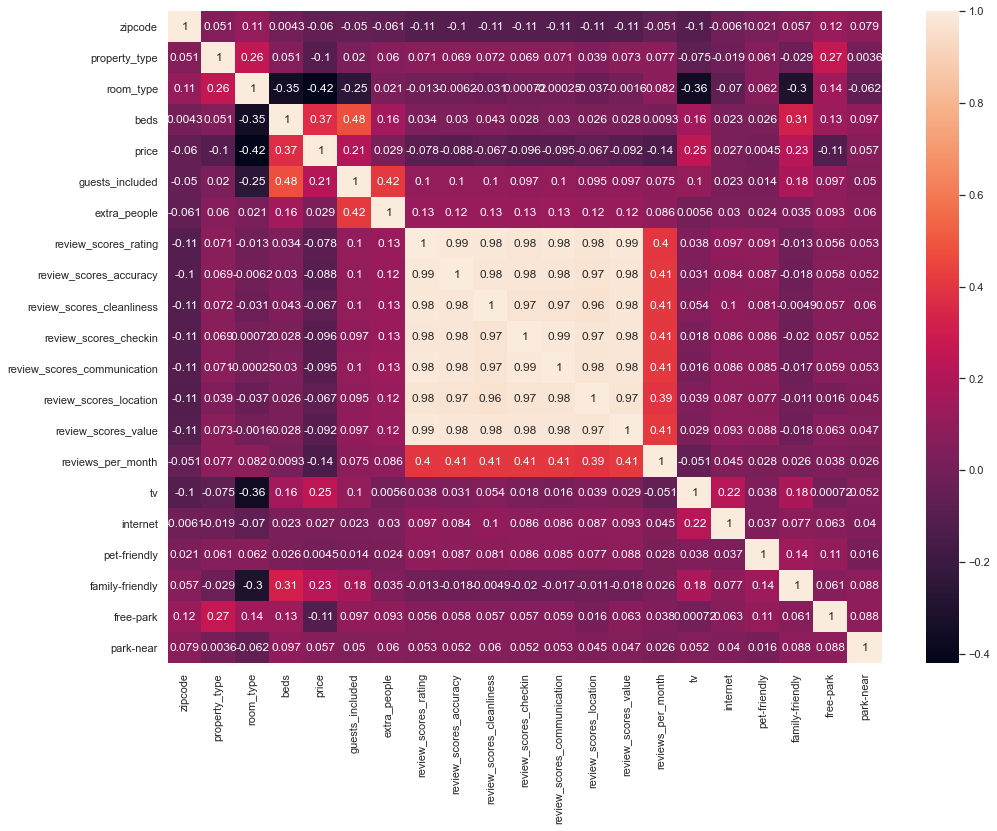

In [2606]:

sns.set(rc={'figure.figsize':(16,12)})

corr =boston_df3_listings[reviews].corr()
sns.heatmap(corr, annot=True);

## Remove Outliers for the price

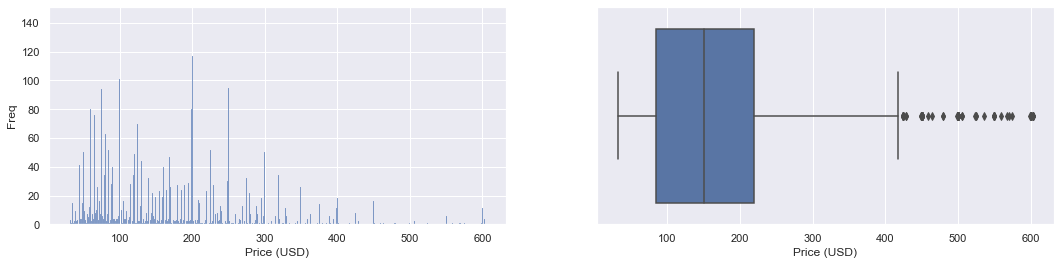

In [2623]:
#Calculate range to exclude the outliers
x = boston_df3_listings.price
upper, lower = np.percentile(x, [1,99])
y = np.clip(x, upper, lower)
indexPersoncnt = boston_df3_listings[ boston_df3_listings['price'] != y].index
boston_df3_listings.drop(indexPersoncnt , inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.histplot(data=boston_df3_listings,x='price',discrete=True,ax=ax[0]) #multiple="stack",ax=ax[0]);
sns.boxplot(data=boston_df3_listings,x='price',ax=ax[1]);
ax[0].set_ylabel('Freq');
ax[0].set_xlabel('Price (USD)');
ax[1].set_xlabel('Price (USD)');

In [2625]:
price = boston_df3_listings.groupby('neighbourhood_cleansed')['price'].mean().to_frame()

### Descriptive Stats to explore relations between features

In [2630]:
latitude = 42.35843
longitude = -71.05977

In [2635]:
import folium
# create map and display it
boston_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [2636]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
boston_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
listings = plugins.MarkerCluster().add_to(boston_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(boston_df3_listings.latitude, boston_df3_listings.longitude, boston_df3_listings.zipcode):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=folium.Popup(label),).add_to(listings)

# display map
boston_map

### Average price per neighborehood

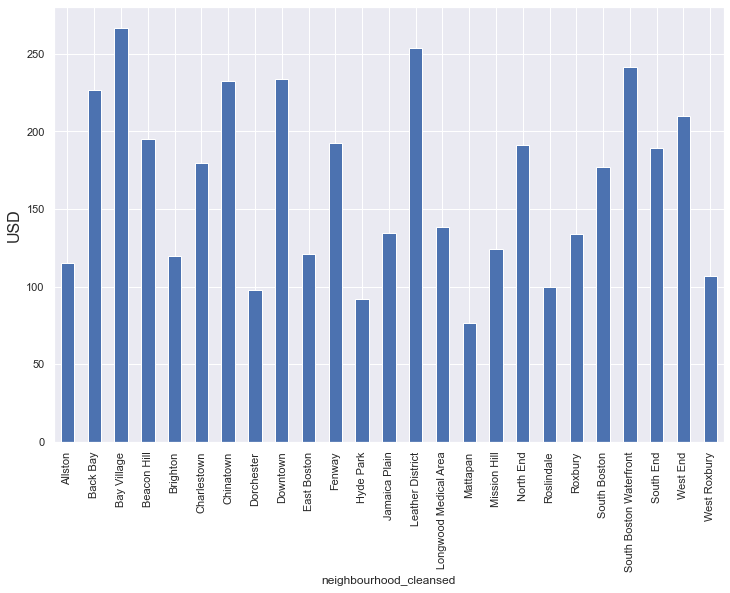

In [2520]:
plt.figure(figsize=(12,8))
boston_df3_listings.groupby('neighbourhood_cleansed')['price'].mean().plot.bar();
plt.ylabel('USD',fontsize=16);

In [2521]:
boston_df3_listings.columns

Index(['id', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'host_is_superhost',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'neighbourhood_cleansed', 'zipcode', 'latitude',
       'longitude', 'property_type', 'room_type', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included', 'extra_people',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'reviews_per_month', 'tv',
       'internet', 'pet-friendly', 'kitchen', 'air-condition',
       'family-friendly', 'free-park', 'gym', 'bus-stop', 'restaurants-near',
       'downtown-near', 'park-near'],
      dtype='object')

## MODELING

### A mulitple linear regresion model will be used to predict the price

### Select and normalize all the features

In [2611]:
y = boston_df3_listings['price'].values

In [2612]:
Features = ['host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'host_is_superhost',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'latitude',
       'longitude', 'property_type', 'room_type',  'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'guests_included',
       'extra_people', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'cancellation_policy',
       'reviews_per_month', 'tv', 'internet','pet-friendly', 'kitchen',
       'air-condition', 'family-friendly', 'free-park', 'gym', 'bus-stop',
       'restaurants-near', 'downtown-near', 'park-near']

In [2524]:
Features = ['room_type', 'number_of_reviews', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_value', 'reviews_per_month', 'free-park','host_is_superhost', 'availability_60', 'latitude', 'longitude',
        'guests_included',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_location', 'tv' ]

In [2525]:
Features = ['latitude','longitude','guests_included', 'review_scores_rating',
       'review_scores_location','room_type', 'review_scores_communication', 'review_scores_value',
       'reviews_per_month','tv', 'restaurants-near', 'downtown-near', 'park-near','pet-friendly', 'kitchen',
       'air-condition', 'family-friendly', 'free-park', 'gym', 'bus-stop' ]

In [2526]:
Features = ['tv', 'pet-friendly', 'kitchen',
       'air-condition', 'family-friendly', 'free-park', 'gym', 'bus-stop',
       'restaurants-near', 'downtown-near', 'park-near','availability_30']

In [2613]:
X = boston_df3_listings[Features].values

### Standarize all the features using MinMaxScaler

In [2614]:
from sklearn import preprocessing
#X= preprocessing.StandardScaler().fit(X).transform(X)
X= preprocessing.MinMaxScaler().fit(X).transform(X)
X[0:1]

array([[0.97557377, 0.93639344, 0.00133511, 0.00133511, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30301887,
        0.22552938, 0.66666667, 0.        , 0.25      , 0.4       ,
        0.1875    , 1.        , 0.07142857, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.        , 1.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

### Split the dataset in train and  testing datasets

In [2615]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2868, 41) (2868,)
Test set: (717, 41) (717,)


In [2616]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [-1.08507513e+01  3.40248867e+00 -2.24533600e+01 -2.24533600e+01
  2.71306095e+01  9.59174263e+00  3.28683210e+01 -1.61781342e+01
  4.09861068e+00  7.82051268e+01  5.46224046e+01 -1.24000119e+01
 -1.23495680e+02  1.92897618e+02  1.93132796e+02  2.22151947e+02
 -3.55381265e+00  4.13377639e+01 -3.30543636e+01 -4.77889280e+01
  1.09632431e+02 -3.25484148e+01  2.82752154e+01 -2.84030326e+01
 -4.82723635e+01  6.75550408e+01 -1.09425430e+02  8.48352761e-01
 -1.13380722e+02  2.30006731e+01 -7.07760296e+00  8.91900331e+00
 -2.12855580e+01  1.82506862e+01  7.77993527e+00 -2.60207957e+01
  2.34144349e+01 -2.83548142e+00  4.30620444e+00 -7.06771403e+00
  8.76256346e-02]


In [2617]:
regr.intercept_

23.109931793819015

In [2618]:
boston_df3_listings[Features].columns[regr.coef_ < -30]

Index(['room_type', 'extra_people', 'number_of_reviews',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [2619]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean absolute error: 57.69
Residual sum of squares (MSE): 26884.76
R2-score: -2.75
Variance score: 0.21


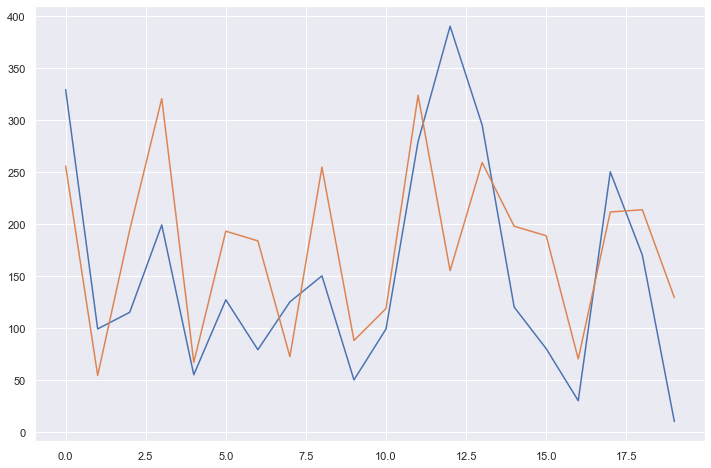

In [2620]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(len(X_test[:20])),y_test[:20])
plt.plot(range(len(X_test[:20])),y_hat[:20])

In [2621]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2622]:

#X, y = make_regression(n_features=4, n_informative=2,   random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=14, random_state=0,criterion = 'mse', n_estimators = 100)
regr.fit(X_train, y_train)

y_hat= regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

print('Variance score: %.2f' % regr.score(X_test, y_test))



Mean absolute error: 49.96
Residual sum of squares (MSE): 26284.80
R2-score: -1.88
Variance score: 0.23


In [2537]:
from sklearn.model_selection import cross_val_score, GridSearchCV
gsc = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'max_depth': range(10,15),'criterion':('mse', 'mae'),'n_estimators': ( 50, 100, 500), },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
regr = gsc.fit(X_train, y_train)

print('Done')
#best_params = grid_result.best_params_
    
#regr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)

KeyboardInterrupt: 

In [ ]:
regr.best_params_

In [ ]:
y_hat= regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

print('Variance score: %.2f' % regr.score(X_test, y_test))

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(len(X_test[:20])),y_test[:20])
plt.plot(range(len(X_test[:20])),y_hat[:20])